In [59]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
fp = "../matlab/parafac_results.txt"

In [2]:
with open(fp) as f:
    lines = f.readlines()


In [3]:
for l in lines:
    res = re.match("Iter  (\d+): fit = ([0-9\.\-]+) fitdelta = ([0-9\.\-]+).*", l)

'Iter  1: fit = 6.618968e-02 fitdelta = 6.6e-02\n'

In [51]:
results = list()
for l in lines:
    print(l)
    iternum = re.match("^Iter[\.\s]+(\d+).*", l).group(1)
    fit = re.match(".*fit = ([0-9e\.\-]+).*", l).group(1)
    fitdelta = re.match(".*fitdelta = ([0-9e\.\-]+).*", l).group(1)
    print("iter %s fit %s fitdelta %s" % (iternum, fit, fitdelta))
    results.append((iternum, float(fit), float(fitdelta)))

Iter  1: fit = 6.618968e-02 fitdelta = 6.6e-02

iter 1 fit 6.618968e-02 fitdelta 6.6e-02
Iter  2: fit = 7.427117e-02 fitdelta = 8.1e-03

iter 2 fit 7.427117e-02 fitdelta 8.1e-03
Iter  3: fit = 8.440357e-02 fitdelta = 1.0e-02

iter 3 fit 8.440357e-02 fitdelta 1.0e-02
Iter  4: fit = 9.785512e-02 fitdelta = 1.3e-02

iter 4 fit 9.785512e-02 fitdelta 1.3e-02
Iter  5: fit = 1.079659e-01 fitdelta = 1.0e-02

iter 5 fit 1.079659e-01 fitdelta 1.0e-02
Iter  6: fit = 1.163126e-01 fitdelta = 8.3e-03

iter 6 fit 1.163126e-01 fitdelta 8.3e-03
Iter  7: fit = 1.233215e-01 fitdelta = 7.0e-03

iter 7 fit 1.233215e-01 fitdelta 7.0e-03
Iter  8: fit = 1.292431e-01 fitdelta = 5.9e-03

iter 8 fit 1.292431e-01 fitdelta 5.9e-03
Iter  9: fit = 1.342881e-01 fitdelta = 5.0e-03

iter 9 fit 1.342881e-01 fitdelta 5.0e-03
Iter 10: fit = 1.386815e-01 fitdelta = 4.4e-03

iter 10 fit 1.386815e-01 fitdelta 4.4e-03
Iter 11: fit = 1.425703e-01 fitdelta = 3.9e-03

iter 11 fit 1.425703e-01 fitdelta 3.9e-03
Iter 12: fit = 1.46

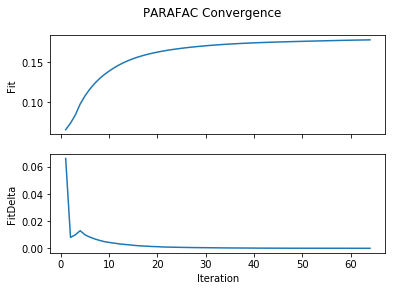

In [77]:
df = pd.DataFrame(results, columns=["Iter", "Fit", "FitDelta"], dtype=float)
fig, axs = plt.subplots(2, sharex=True)
axs[0].plot(df["Iter"], df["Fit"])
axs[0].set_ylabel("Fit")
axs[1].plot(df["Iter"], df["FitDelta"])
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("FitDelta")
fig.suptitle("PARAFAC Convergence")
plt.savefig("../../img/parafac/convergence.png")